In [95]:
"""
Solving FrozenLake8x8 environment using Value-Itertion.
Author : Moustafa Alzantot (malzantot@ucla.edu)
Citation: https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
"""
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
from gym import wrappers
import seaborn as sns
import matplotlib.pyplot as plt
import time

np.random.seed(42)

def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0,  n = 2000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return scores

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma = 1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 10000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v
    

In [99]:
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 1.0]:
    print("gamma = " + str(i))
    env_name  = 'FrozenLake8x8-v0'
    gamma = i
    env = gym.make(env_name)
    optimal_v = value_iteration(env, i);
    policy = extract_policy(optimal_v, i)
    policy_scores = evaluate_policy(env, policy, i, n=3000)
    print('Policy average score = ', np.mean(policy_scores))

gamma = 1e-06
Value-iteration converged at iteration# 2357.
Policy average score =  3.3333366666733304e-118
gamma = 1e-05
Value-iteration converged at iteration# 2357.
Policy average score =  1.0000033333333351e-118
gamma = 0.0001
Value-iteration converged at iteration# 2357.
Policy average score =  6.667000000006676e-88
gamma = 0.001
Value-iteration converged at iteration# 2357.
Policy average score =  6.670013346673357e-82
gamma = 0.01
Value-iteration converged at iteration# 2357.
Policy average score =  3.3333400006667017e-34
gamma = 0.1
Value-iteration converged at iteration# 2357.
Policy average score =  4.787448426022346e-24
gamma = 0.2
Value-iteration converged at iteration# 2357.
Policy average score =  1.0552169000220018e-17
gamma = 0.4
Value-iteration converged at iteration# 2357.
Policy average score =  1.516071285389632e-11
gamma = 0.8
Value-iteration converged at iteration# 2357.
Policy average score =  6.571843337414203e-05
gamma = 1.0
Value-iteration converged at iterati

In [15]:
len(policy_scores)

10000

In [97]:
gamma = 1.0

In [104]:
env_name  = 'FrozenLake8x8-v0'
env = gym.make(env_name)
start = time.time()
optimal_v = value_iteration(env, gamma);
print("Average time: " + str(((time.time() - start))))
policy = extract_policy(optimal_v, gamma)
policy_scores = evaluate_policy(env, policy, gamma, n=3000)
print('Average score = ', np.mean(policy_scores))


Value-iteration converged at iteration# 2357.
Average time: 2.6078240871429443
Average score =  0.878


In [44]:
plt.figure(figsize=(5, 16))
sns.heatmap(policy,  cmap="YlGnBu", annot=True, cbar=False, square=True);

IndexError: Inconsistent shape between the condition and the input (got (10000, 1) and (10000,))

<Figure size 360x1152 with 0 Axes>

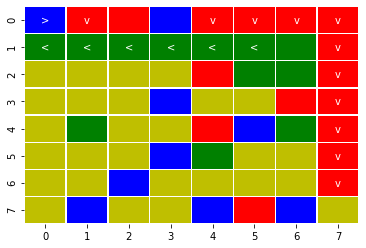

Total Reward:  1.0


In [112]:
# https://towardsdatascience.com/this-is-how-reinforcement-learning-works-5080b3a335d6
# function for displaying a heatmap
def display_value_iteration(P, env = gym.make('FrozenLake8x8-v0')):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<', 
                              np.where(P==1, 'v', 
                                       np.where(P==2, '>', 
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             ) 
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    total_reward = 0
    s = env.reset()
    #env.render()
    done = False
    while done != True: 
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('>' if best_a==1 else ('v' if best_a==2 else '<'))   
        #print(s, best_a)
        s, rew, done, info = env.step(best_a) #take step using selected action
        total_reward = total_reward + rew
        visited_states[s] = 1 # mark the state as visited
        #env.render()
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 linewidth=0.5, 
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward)
    
# display heatmap for a 4x4 board
display_value_iteration(policy, env = env)

In [19]:
# How many iterations does it take to converge?
# 2357

# How did you choose to define convergence?
# if the sum of the differences between the values of each iteration is less than epsilon, then we can say that the model has converged

# episilon = 1e-20, which means that there is a low chance of selecting a random action instead of the desired action
# The reward for falling into the hole ends the game

# How did the number of states affect things, if at all?
# 4x4=16 states vs 8x8=64 states
# Clock Time: 0.000736 seconds, 0.00233 seconds
# Policy average score: 0.737, 0.866
# Iterations to value iteration convergence: 1373, 2357
# Total Reward: 1.0, 1.0 

In [42]:
S_n=40

def policy_evaluation(env, policy, gamma=1., theta=1e-8):
    r"""Policy evaluation function. Loop until state values stable, delta < theta.

    Returns V comprising values of states under given policy.

    Args:
        env (gym.env): OpenAI environment class instantiated and assigned to an object.
        policy (np.array): policy array to evaluate
        gamma (float): discount rate for rewards
        theta (float): tiny positive number, anything below it indicates value function convergence
    """
    # 1. Create state-value array (16,)
    V = np.zeros(S_n)
    while True:
        delta = 0

        # 2. Loop through states
        for s in range(S_n):
            Vs = 0

            # 2.1 Loop through actions for the unique state
            # Given each state, we've 4 actions associated with different probabilities
            # 0.25 x 4 in this case, so we'll be looping 4 times (4 action probabilities) at each state
            for a, action_prob in enumerate(policy[s]):
                # 2.1.1 Loop through to get transition probabilities, next state, rewards and whether the game ended
                for prob, next_state, reward, done in env.P[s][a]:
                    # State-value function to get our values of states given policy
                    Vs += action_prob * prob * (reward + gamma * V[next_state])

            # This simple equation allows us to stop this loop when we've converged
            # How do we know? The new value of the state is smaller than a tiny positive value we set
            # State value change is tiny compared to what we have so we just stop!
            delta = max(delta, np.abs(V[s]-Vs))

            # 2.2 Update our state value for that state
            V[s] = Vs

        # 3. Stop policy evaluation if our state values changes are smaller than our tiny positive number
        if delta < theta:
            break

    return V

# Generate random policy with equal probabilities of each action given any state
# Evaluate the policy to get state values
V = policy_evaluation(env, policy)

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(4, 4),  cmap="YlGnBu", annot=True, cbar=False);

TypeError: 'numpy.float64' object is not iterable

Text(0.5, 0, 'Reward')

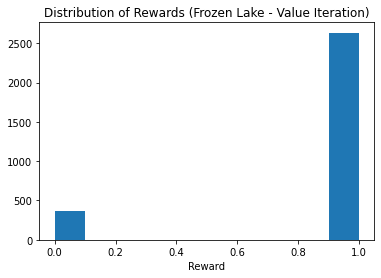

In [115]:
plt.hist(policy_scores)
plt.title("Distribution of Rewards (Frozen Lake - Value Iteration)")
plt.xlabel("Reward")

In [ ]:
plt.plot(policy_scores, )